**Retail Sales Dashboard & Insights Analysis – Office Supplies Dataset**
==============================================

dataset preso da Kaggle: https://www.kaggle.com/datasets/wellkilo/supermarket-dataset

Struttura del notebook 
==========================
-Importazione librerie & caricamento dati  

-Esplorazione dei dati  

-Pulizia dei dati  

-Analisi esplorativa (EDA)  

-Visualizzazioni  

-Insights & Raccomandazioni  

**1. Importazione librerie & caricamento dati**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Visual settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Caricamento dataset
df = pd.read_excel("sales_data.xlsx") 

# Anteprima
df.head()


,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2013-01-07,Standard Class,Texas,Paper,0.2,1,$6,0.34,2,$16
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,2013-01-08,Standard Class,Illinois,Labels,0.2,1,$4,0.36,3,$12
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2013-01-08,Standard Class,Illinois,Storage,0.2,1,-$65,-0.24,3,$273
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2013-01-08,Standard Class,Illinois,Binders,0.8,1,-$5,-1.55,2,$4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,$5,0.25,3,$20


**2. Esplorazione dei dati**

In [19]:
# Info generali
df.info()

# Statistiche descrittive
df.describe(include='all')

# Controllo valori nulli
df.isnull().sum()

# Tipi di categorie
print("Categorie:", df["Category"].unique())
print("Segmenti:", df["Segment"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Date          9994 non-null   datetime64[ns]
 12  Ship Mode          9994 non-null   object        
 13  State              9994 non-null   object        
 14  Sub-Cate

**3. Pulizia dei dati**

In [22]:
# Conversione date
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Nuova colonna: tempo spedizione
df["Shipping Delay (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Rimozione spazi bianchi
df.columns = df.columns.str.strip()
df["Category"] = df["Category"].str.strip()

# Rimuove il simbolo $ e converte in numerico
df["Sales"] = df["Sales"].replace('[\$,]', '', regex=True)
df["Profit"] = df["Profit"].replace('[\$,]', '', regex=True)

df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\fabri\AppData\Local\Temp\ipykernel_9712\1006184175.py:13: SyntaxWarning: invalid escape sequence '\$'
  df["Sales"] = df["Sales"].replace('[\$,]', '', regex=True)
C:\Users\fabri\AppData\Local\Temp\ipykernel_9712\1006184175.py:14: SyntaxWarning: invalid escape sequence '\$'
  df["Profit"] = df["Profit"].replace('[\$,]', '', regex=True)


**4. Analisi esplorativa (EDA)**

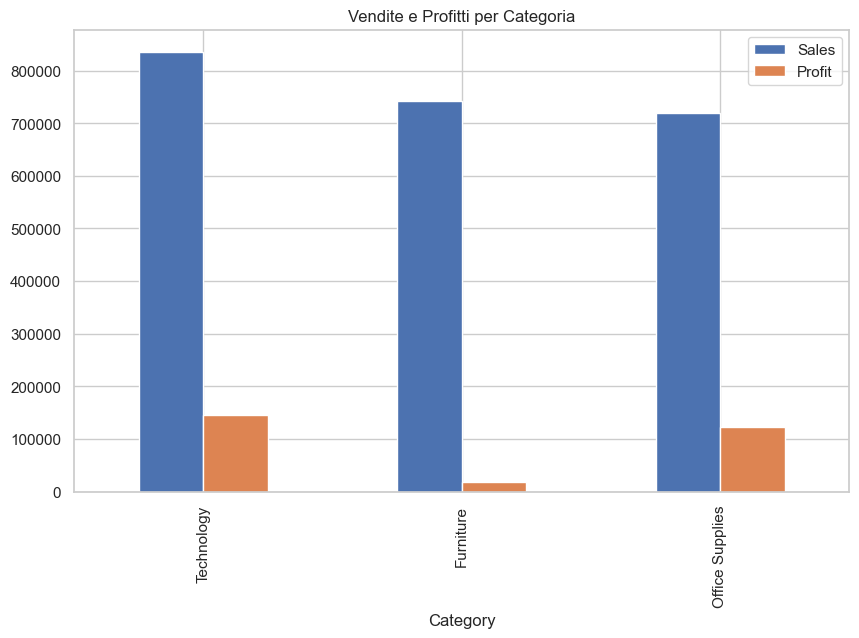

<Axes: title={'center': 'Top 10 Prodotti con Perdite'}, ylabel='Product Name'>

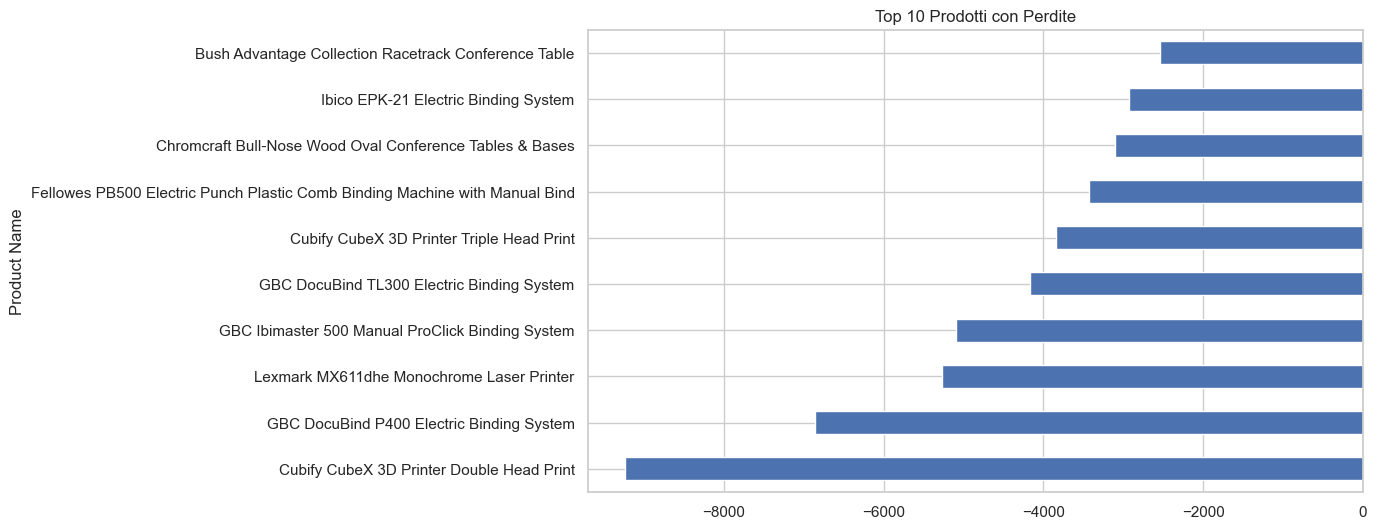

In [29]:
##Vendite e profitti per categoria
cat_sales = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
cat_sales.plot(kind="bar", title="Vendite e Profitti per Categoria")
plt.show()

##Prodotti con più perdite
loss_products = df[df["Profit"] < 0]
top_loss = loss_products.groupby("Product Name")["Profit"].sum().sort_values().head(10)
top_loss.plot(kind="barh", title="Top 10 Prodotti con Perdite")







<Axes: title={'center': 'Vendite e Profitti per Segmento'}, xlabel='Segment'>

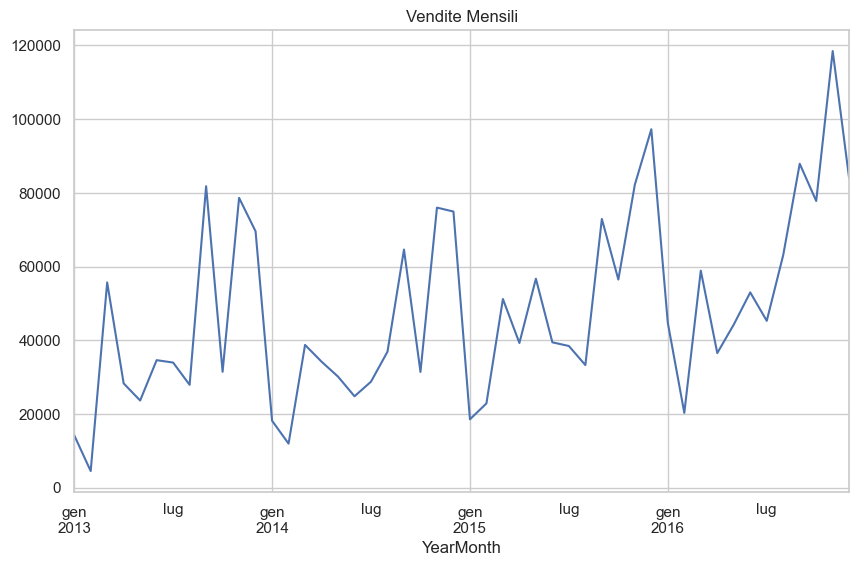

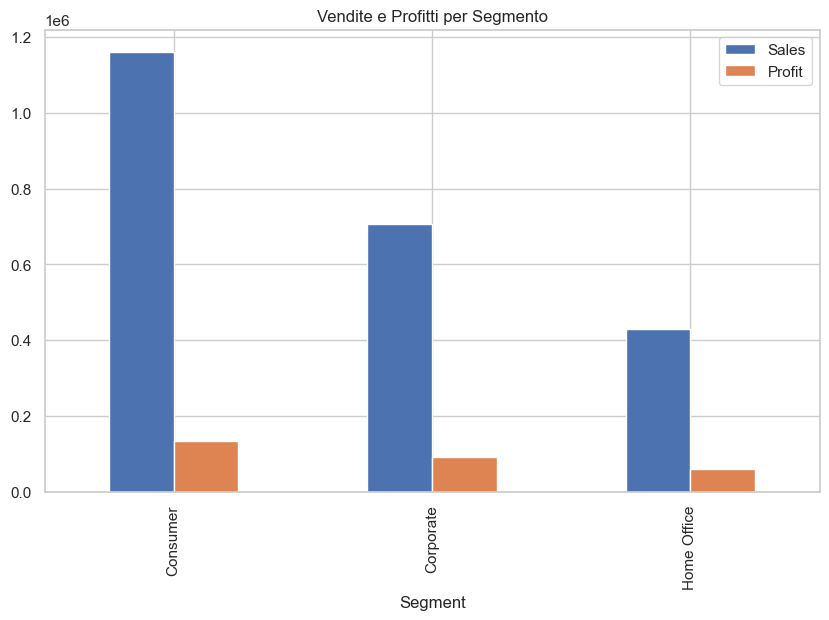

In [31]:
##Vendite mensili
df["YearMonth"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("YearMonth")["Sales"].sum()
monthly_sales.plot(title="Vendite Mensili")

##Analisi Segmenti
segment_sales = df.groupby("Segment")[["Sales", "Profit"]].sum()
segment_sales.plot(kind="bar", title="Vendite e Profitti per Segmento") 

**5. Visualizzazioni aggiuntive**

Text(0.5, 1.0, 'Profitti per Categoria e Sottocategoria')

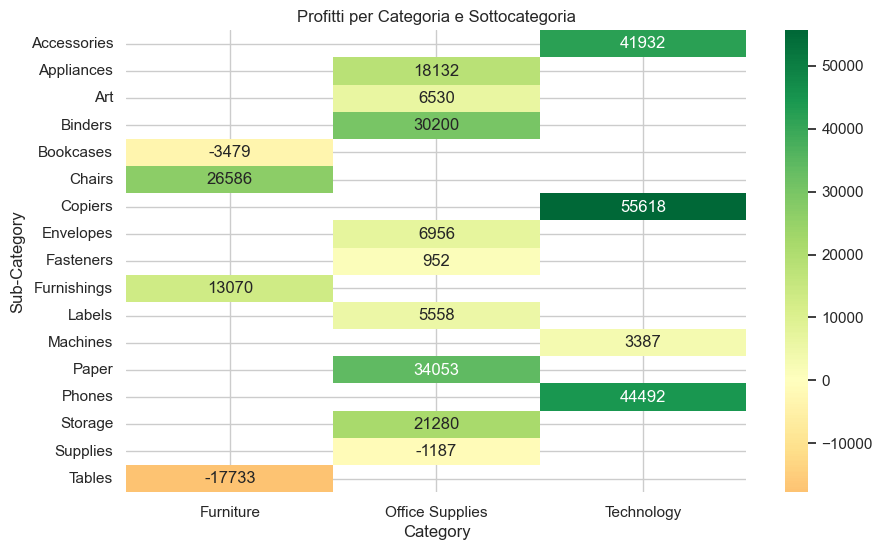

In [33]:
##Heatmap profitto per Categoria e Sub-Category
pivot = df.pivot_table(index="Sub-Category", columns="Category", values="Profit", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="RdYlGn", center=0)
plt.title("Profitti per Categoria e Sottocategoria")


<Axes: title={'center': 'Top 10 Stati per Vendite'}, xlabel='State'>

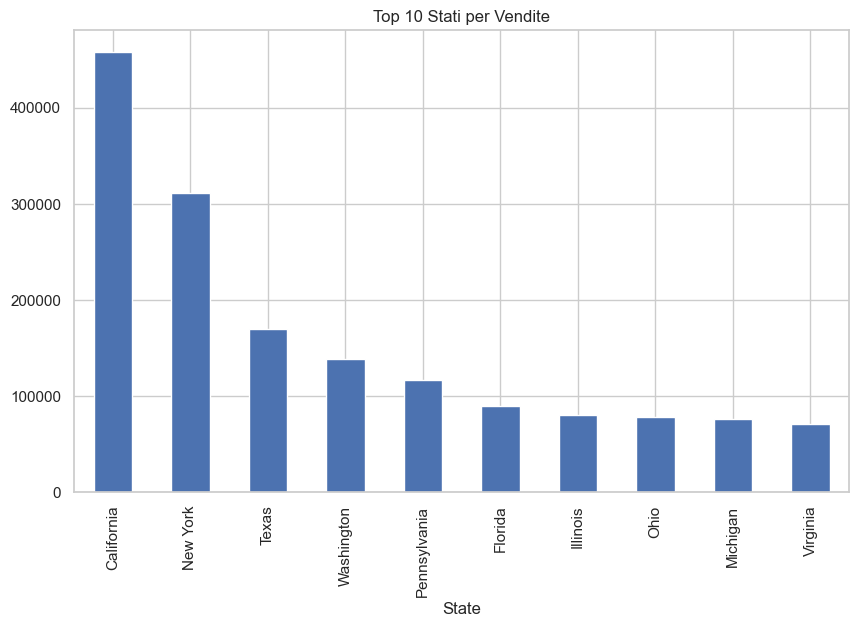

In [34]:
##Mappa vendite per Stato
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind="bar", title="Top 10 Stati per Vendite")

**6. Insights & Raccomandazioni**

In [35]:
from IPython.display import Markdown

Markdown("""
## 🔍 Business Insights

- La categoria **Technology** genera i maggiori profitti.
- Alcuni prodotti (es. stampanti) con **forti sconti** causano perdite.
- Il segmento **Home Office** è meno redditizio: potrebbe essere ottimizzato.
- Alcuni stati come **California e New York** dominano le vendite.

## ✅ Raccomandazioni

1. Rivedere la strategia di sconto per prodotti in perdita.
2. Espandere promozioni nelle regioni ad alte vendite.
3. Ottimizzare la logistica in regioni con alti tempi di spedizione.
""")



## 🔍 Business Insights

- La categoria **Technology** genera i maggiori profitti.
- Alcuni prodotti (es. stampanti) con **forti sconti** causano perdite.
- Il segmento **Home Office** è meno redditizio: potrebbe essere ottimizzato.
- Alcuni stati come **California e New York** dominano le vendite.

## ✅ Raccomandazioni

1. Rivedere la strategia di sconto per prodotti in perdita.
2. Espandere promozioni nelle regioni ad alte vendite.
3. Ottimizzare la logistica in regioni con alti tempi di spedizione.


**Altri Grafici:**


C:\Users\fabri\AppData\Local\Temp\ipykernel_9712\2660147799.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_profit = df.groupby("Discount Level")["Profit"].mean().sort_values()


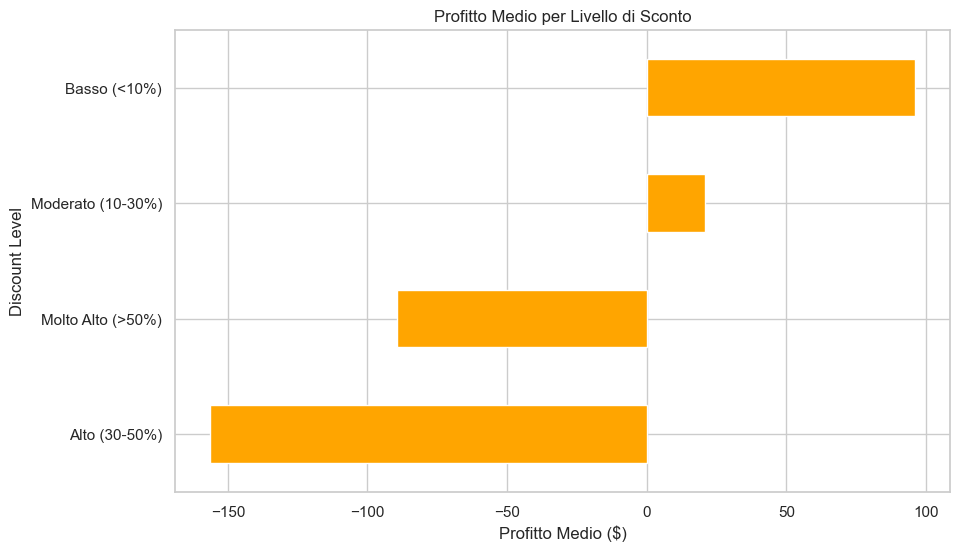

In [36]:
##Analisi della redditività per sconto:
##Capire se offrire sconti alti aumenta o distrugge il profitto.
# Categorizza gli sconti
df["Discount Level"] = pd.cut(df["Discount"], bins=[0, 0.1, 0.3, 0.5, 1], 
                              labels=["Basso (<10%)", "Moderato (10-30%)", "Alto (30-50%)", "Molto Alto (>50%)"])

# Media dei profitti per livello di sconto
discount_profit = df.groupby("Discount Level")["Profit"].mean().sort_values()
discount_profit.plot(kind="barh", title="Profitto Medio per Livello di Sconto", color="orange")
plt.xlabel("Profitto Medio ($)")
plt.show()


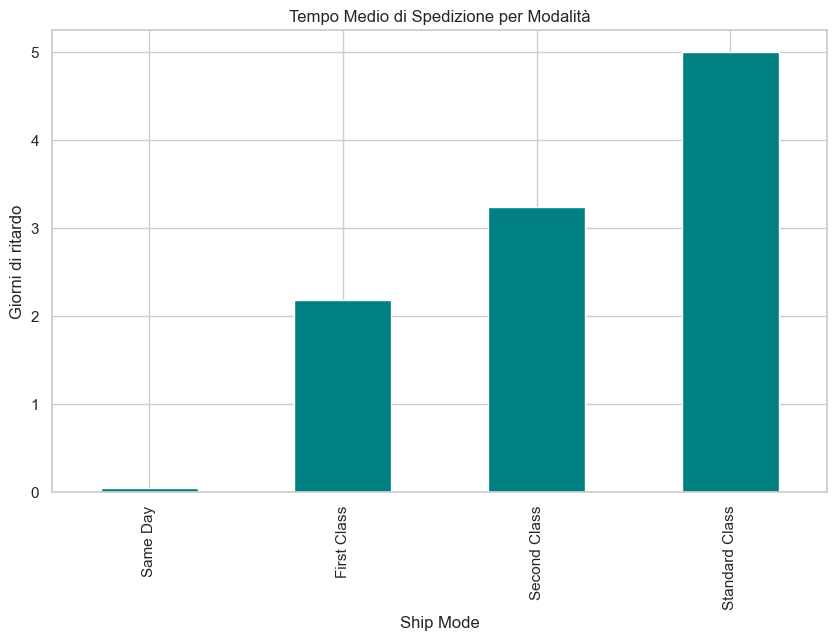

In [37]:
##Analisi della spedizione e ritardi
##Capire quali modalità di spedizione causano più ritardi.
# Media dei giorni di spedizione per Ship Mode
shipping_delays = df.groupby("Ship Mode")["Shipping Delay (Days)"].mean().sort_values()
shipping_delays.plot(kind="bar", title="Tempo Medio di Spedizione per Modalità", color="teal")
plt.ylabel("Giorni di ritardo")
plt.show()


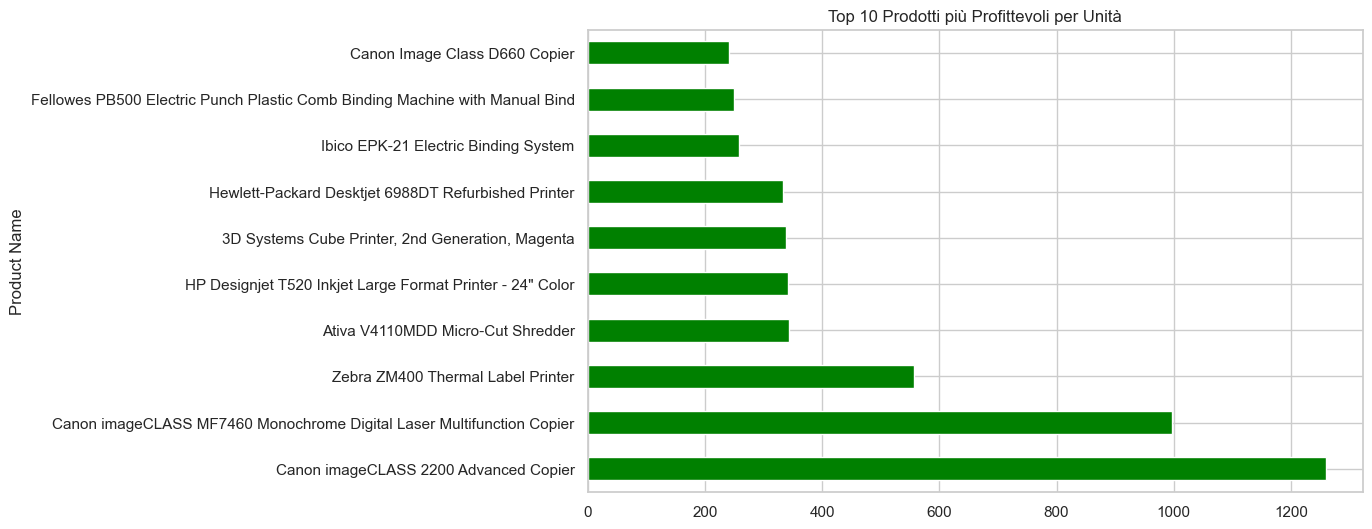

In [38]:
## Top prodotti per profitto/unità
##Scoprire i prodotti più profittevoli per unità venduta.
# Profitto medio per unità venduta
product_profitability = df.groupby("Product Name")[["Profit", "Quantity"]].sum()
product_profitability["Profit per Unit"] = product_profitability["Profit"] / product_profitability["Quantity"]
top_profitable = product_profitability.sort_values("Profit per Unit", ascending=False).head(10)

top_profitable["Profit per Unit"].plot(kind="barh", title="Top 10 Prodotti più Profittevoli per Unità", color="green")
plt.show()


C:\Users\fabri\AppData\Local\Temp\ipykernel_9712\232393116.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M", on="Order Date")["Sales"].sum()


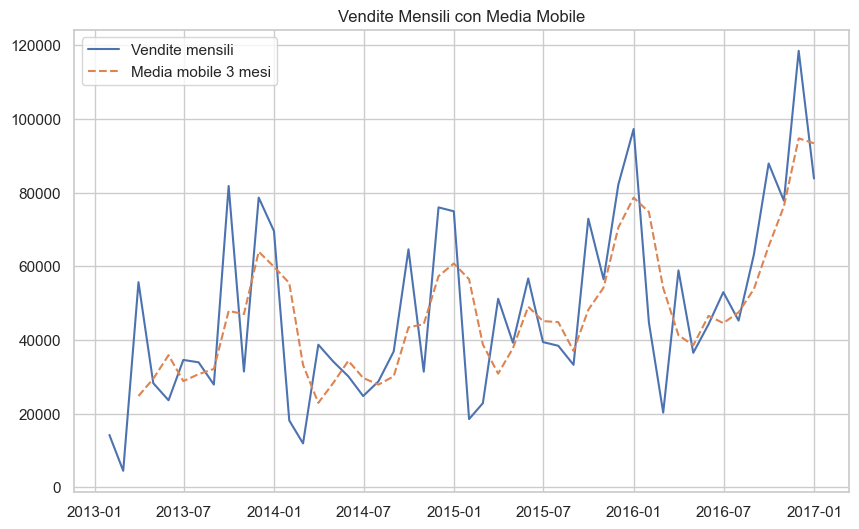

In [39]:
##Time series con media mobile
##Visualizzare l’andamento delle vendite nel tempo in modo più fluido.
monthly = df.resample("M", on="Order Date")["Sales"].sum()
monthly_ma = monthly.rolling(window=3).mean()

plt.plot(monthly.index, monthly, label="Vendite mensili")
plt.plot(monthly_ma.index, monthly_ma, label="Media mobile 3 mesi", linestyle="--")
plt.title("Vendite Mensili con Media Mobile")
plt.legend()
plt.show()


In [40]:
##Creazione di KPI principali
##Mostrare i numeri chiave come in un dashboard.
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_discount = df["Discount"].mean()
most_profitable_state = df.groupby("State")["Profit"].sum().idxmax()

print(f"📈 Vendite Totali: ${total_sales:,.2f}")
print(f"💰 Profitto Totale: ${total_profit:,.2f}")
print(f"🔻 Sconto Medio: {avg_discount:.2%}")
print(f"🏆 Stato più profittevole: {most_profitable_state}")


📈 Vendite Totali: $2,297,354.00
💰 Profitto Totale: $286,347.00
🔻 Sconto Medio: 15.62%
🏆 Stato più profittevole: California


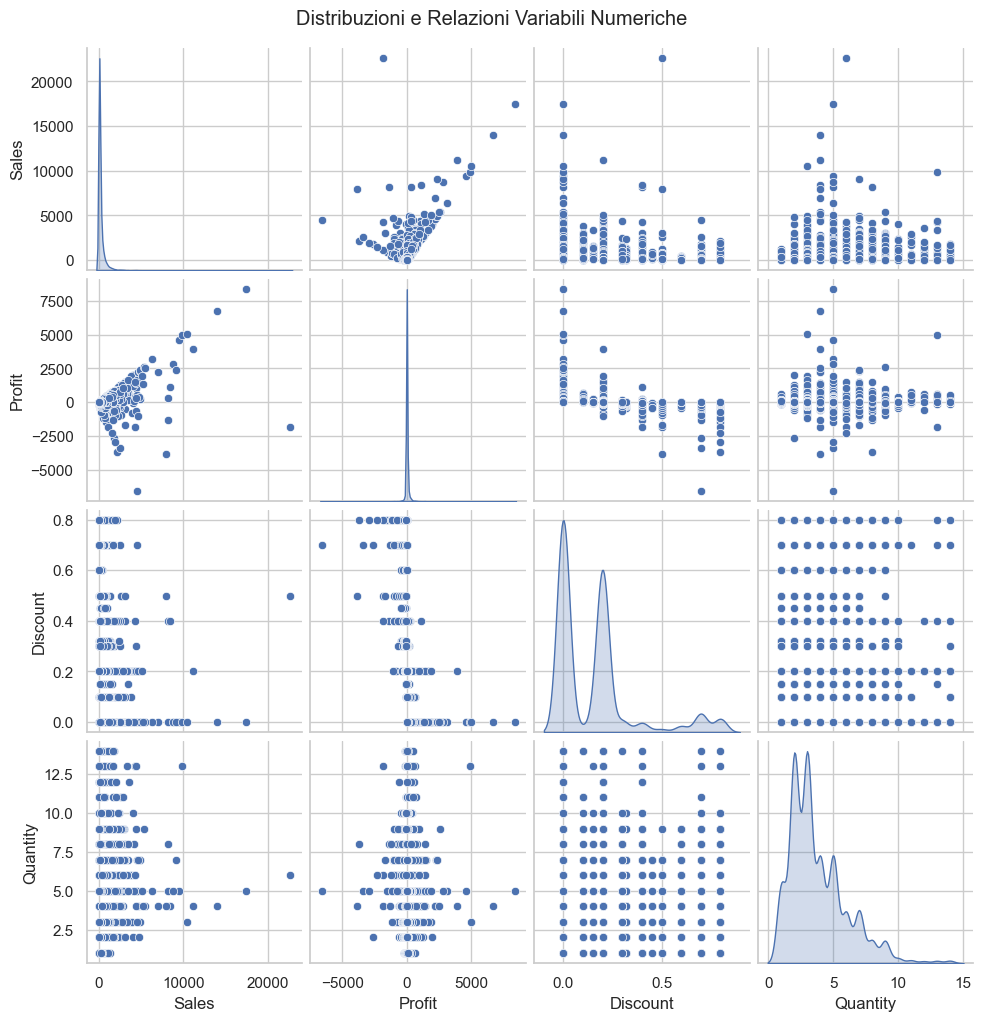

In [41]:
##Visualizzazione con Seaborn Pairplot
##Scoprire correlazioni visive tra vendite, sconti, profitti, quantità.
sns.pairplot(df[["Sales", "Profit", "Discount", "Quantity"]], diag_kind="kde")
plt.suptitle("Distribuzioni e Relazioni Variabili Numeriche", y=1.02)
plt.show()
